In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("data\\clean.csv")

In [4]:
df

,Location,Carpet Area,Transaction,Furnishing,Facing,Society,Bathroom,Balcony,Ownership,Area(in sqft),BHK,FlatFloor,TotalFloors,Basement,Main Road,Garden/Park,Pool,ParkingNumbers,Parking Type,SalePrice(in Crores)
0,Thane,500.0,Resale,Unfurnished,Not Informed,Srushti Siddhi Mangal Murti Complex,1,2,N\A,700.0,1.0,10.0,11.0,False,Not Available,Not Available,Not Available,0,Not Available,0.42
1,Thane,473.0,Resale,Semi-Furnished,East,Dosti Vihar,2,0,Freehold,710.0,2.0,3.0,22.0,False,False,True,False,1,Open,0.98
2,Thane,779.0,Resale,Unfurnished,East,Sunrise by Kalpataru,2,0,Freehold,800.0,2.0,10.0,29.0,False,False,True,False,1,Covered,1.40
3,Thane,NaN,New Property,Unfurnished,East,Crystal Spires,3,0,Freehold,2050.0,3.0,10.0,25.0,False,True,True,True,0,Not Available,3.10
4,Thane,530.0,Resale,Semi-Furnished,East,Sunrise by Kalpataru,2,0,Freehold,780.0,2.0,13.0,26.0,False,True,True,True,1,Covered,0.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65234,Zirakpur,NaN,New Property,Semi-Furnished,East,Bollywood Esencia,3,3,Freehold,1953.0,3.0,2.0,4.0,False,False,True,False,1,Covered,0.63
65235,Zirakpur,NaN,Resale,Unfurnished,North - East,Sushma Urban Views,3,0,N\A,1680.0,3.0,4.0,6.0,False,True,True,False,1,Covered,0.55
65236,Zirakpur,1250.0,Resale,Furnished,East,Bollywood Esencia,3,2,Freehold,1750.0,3.0,1.0,3.0,False,True,True,False,1,Covered,0.76
65237,Zirakpur,NaN,Resale,Semi-Furnished,Not Informed,Friends Enclave,2,0,N\A,709.0,2.0,2.0,2.0,False,True,False,False,0,Not Available,0.30


In [5]:
df["SalePrice(in Crores)"]

0        0.42
1        0.98
2        1.40
3        3.10
4        0.95
         ... 
65234    0.63
65235    0.55
65236    0.76
65237    0.30
65238    1.18
Name: SalePrice(in Crores), Length: 65239, dtype: float64

In [9]:
df["SalePrice(in Crores)"].describe()

count    62432.000000
mean         1.038397
std          6.403658
min          0.010000
25%          0.405000
50%          0.643000
75%          1.050000
max       1400.300000
Name: SalePrice(in Crores), dtype: float64

(array([16763., 24270.,  9347.,  4044.,  2248.,  1471.,  1103.,   729.,
          471.,  1986.]),
 array([0.01 , 0.424, 0.838, 1.252, 1.666, 2.08 , 2.494, 2.908, 3.322,
        3.736, 4.15 ]),
 <BarContainer object of 10 artists>)

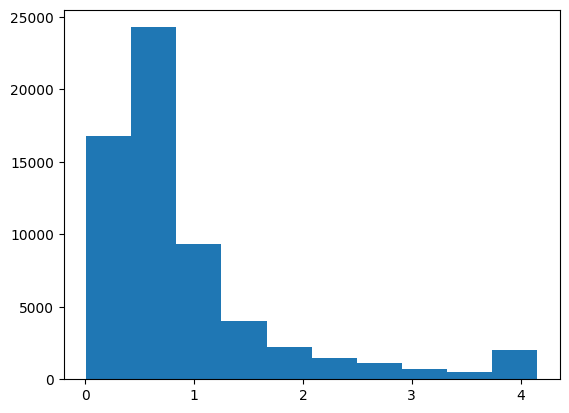

In [28]:
plt.hist(np.where(df['SalePrice(in Crores)'] > df["SalePrice(in Crores)"].quantile(0.975), df["SalePrice(in Crores)"].quantile(0.975), df['SalePrice(in Crores)']), bins=10)

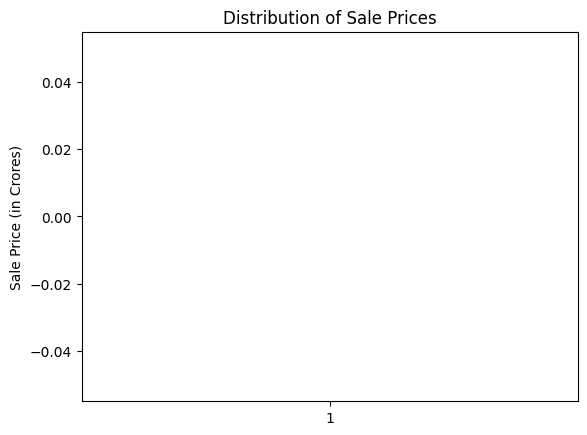

In [15]:
plt.boxplot(df["SalePrice(in Crores)"])
plt.title("Distribution of Sale Prices")
plt.ylabel("Sale Price (in Crores)")
plt.show()


In [25]:
q1 = df["SalePrice(in Crores)"].quantile(0.025)
q3 = df["SalePrice(in Crores)"].quantile(0.975)
IQR = q3 - q1

lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

outliers = df[(df['SalePrice(in Crores)'] < lower_bound) | (df['SalePrice(in Crores)'] > upper_bound)]
outliers

,Location,Carpet Area,Transaction,Furnishing,Facing,Society,Bathroom,Balcony,Ownership,Area(in sqft),BHK,FlatFloor,TotalFloors,Basement,Main Road,Garden/Park,Pool,ParkingNumbers,Parking Type,SalePrice(in Crores)
14,Mumbai,2850.0,Resale,Unfurnished,North,MidCity Shikhar,5,1,Freehold,2850.0,5.0,14.0,35.0,False,True,True,True,0,Not Available,12.50
393,Ahmedabad,8000.0,Resale,Furnished,North - East,Verantes,4,1,Freehold,14544.0,4.0,12.0,12.0,False,True,True,False,0,Not Available,11.00
619,Ahmedabad,8000.0,New Property,Unfurnished,East,Verantes,8,3,Freehold,12500.0,6.0,13.0,13.0,False,True,True,True,4,Covered,11.00
1376,Ahmedabad,5000.0,Resale,Furnished,East,N\A,5,3,Freehold,8000.0,4.0,15.0,15.0,False,False,True,True,3,Covered,10.51
1513,Ahmedabad,5000.0,New Property,Unfurnished,East,Skydeck Seasons,6,1,Freehold,9000.0,5.0,7.0,7.0,False,Not Available,Not Available,Not Available,5,Covered,11.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56077,Surat,NaN,Resale,Unfurnished,Not Informed,N\A,2,0,N\A,3700.0,2.0,0.0,4.0,False,Not Available,Not Available,Not Available,0,Not Available,12.00
58948,Vadodara,1252.0,New Property,Unfurnished,Not Informed,Nest Harmony,3,5,N\A,2090.0,3.0,5.0,9.0,False,Not Available,Not Available,Not Available,1,Covered,1400.30
61013,Varanasi,NaN,Resale,Furnished,Not Informed,N\A,10,0,N\A,20000.0,Unknown,-2.0,4.0,True,Not Available,Not Available,Not Available,0,Not Available,80.00
63414,Visakhapatnam,NaN,Resale,Semi-Furnished,South - East,N\A,> 10,6,Freehold,13000.0,10.0,0.0,5.0,False,True,False,False,6,Covered,13.00
